In [81]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [161]:
m0_logs1 = json.load(open("combined_logs_m0_prompt_k_1_15_index_0_200.json", "r", encoding="utf-8"))
m0_logs2 = json.load(open("combined_logs_m0_prompt_k_1_15_index_200_400.json", "r", encoding="utf-8"))
m0_logs3 = json.load(open("combined_logs_m0_prompt_k_1_15_index_400_420.json", "r", encoding="utf-8"))
m0_logs4 = json.load(open("combined_logs_m0_prompt_k_1_15_index_420_600.json", "r", encoding="utf-8"))

In [163]:
m0_logs = m0_logs1["logs"] + m0_logs2["logs"] + m0_logs3["logs"] + m0_logs4["logs"]

In [164]:
m0_stats = {
    "pass_at_k": {i: 0.0 for i in range(1, 16)},
    "pass_at_k_prune": {i: 0.0 for i in range(1, 16)},
}

In [165]:
for benchmark in m0_logs:
    for k in range(1, 16):
        m0_stats["pass_at_k"][k] += benchmark["pass_at_k"][str(k)]
        m0_stats["pass_at_k_prune"][k] += benchmark["pass_at_k_prune"][str(k)]

In [166]:
for i in range(1, 16):
    m0_stats["pass_at_k"][i] += len(exceptions)
    m0_stats["pass_at_k_prune"][i] += len(exceptions)

In [82]:
m1_logs1 = json.load(open("combined_logs_m1_prompt_k_1_15_index_0_200.json", "r", encoding="utf-8"))
m1_logs2 = json.load(open("combined_logs_m1_prompt_k_1_15_index_200_400.json", "r", encoding="utf-8"))
m1_logs3 = json.load(open("combined_logs_m1_prompt_k_1_15_index_400_600.json", "r", encoding="utf-8"))

In [83]:
m1_logs = m1_logs1["logs"] + m1_logs2["logs"] + m1_logs3["logs"]

In [84]:
gpt_4_failure = []

for benchmark in m1_logs:
    if benchmark["pass_at_k_prune"]["15"] == 0.0:
        gpt_4_failure.append(benchmark["file"])

In [85]:
gpt_4_failure.remove("../new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_1.c")
gpt_4_failure.remove("../new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_2.c")

In [86]:
len(gpt_4_failure)

171

In [25]:
negative_benchmarks = open("../../experiments/negative_benchmarks.txt", "r").read().split("\n")

In [31]:
failure_benchmarks = []
for benchmark in gpt_4_failure:
    if benchmark.startswith("../new_benchmarks/original_benchmarks/"):
        failure_benchmarks.append(benchmark.replace("../new_benchmarks/original_benchmarks/", "../data/benchmarks/"))
    elif benchmark.startswith("../data/benchmarks"):
        failure_benchmarks.append(benchmark)
    else:
        print(benchmark)


In [35]:
positive_failing = list(set(failure_benchmarks) - set(negative_benchmarks))

In [38]:
positive_failing.append("../data/benchmarks/LinearArbitrary-SeaHorn/loops/loops/sum01_true-unreach-call_true-termination.i.annot.c")

In [46]:
failing_benchmarks_post_repair = list(set(positive_failing) - set(repaired_files))

In [47]:
with open("failing_benchmarks.txt", "w") as f:
    for benchmark in sorted(failing_benchmarks_post_repair):
        f.write(benchmark + "\n")

In [4]:
m1_stats = {
    "pass_at_k": {i: 0.0 for i in range(1, 16)},
    "pass_at_k_prune": {i: 0.0 for i in range(1, 16)},
}

In [5]:
for benchmark in m1_logs:
    for k in range(1, 16):
        m1_stats["pass_at_k"][k] += benchmark["pass_at_k"][str(k)]
        m1_stats["pass_at_k_prune"][k] += benchmark["pass_at_k_prune"][str(k)]

In [171]:
for i in range(1, 16):
    m1_stats["pass_at_k"][i] += len(exceptions)
    m1_stats["pass_at_k_prune"][i] += len(exceptions)

In [102]:
success_benchmarks = []

for benchmark in m1_logs:
    if benchmark["pass_at_k_prune"]["15"] == 1.0:
        if benchmark["file"].startswith("../data/benchmarks/"):
            file = benchmark["file"]
            success_benchmarks.append(file)
        elif benchmark["file"].startswith("../new_benchmarks/original_benchmarks/"):
            file = "../data/benchmarks/" + benchmark["file"][len("../new_benchmarks/original_benchmarks/"):]
            success_benchmarks.append(file)
        elif benchmark["file"].startswith("../../data/benchmarks/"):
            file = benchmark["file"][3:]
            success_benchmarks.append(file)
        else:
            print(benchmark["file"])

In [173]:
ultimate_code2inv_file = json.load(open("../ultimate/codetoinv_output.json", "r", encoding="utf-8"))
ultimate_diff_files = json.load(open("../ultimate/diff_files_output.json", "r", encoding="utf-8"))
ultimate_old_mix_files = json.load(open("../ultimate/new_output.json", "r", encoding="utf-8"))

In [174]:
proved_files = []

for file in ultimate_code2inv_file:
    if ultimate_code2inv_file[file]["result"] == "Proved":
        if file.startswith("../data/benchmarks/"):
            proved_files.append("../" + file)
        elif file.startswith("../new_benchmarks/original_benchmarks/"):
            proved_files.append("../../data/benchmarks/" + file[len("../new_benchmarks/original_benchmarks/"):])
        elif file.startswith("../../data/benchmarks/"):
            proved_files.append(file)
        elif file.startswith("../data/new_benchmarks/original_benchmarks/"):
            proved_files.append("../../data/benchmarks/" + file[len("../data/new_benchmarks/original_benchmarks/"):])
        else:
            print(file)

for file in ultimate_diff_files:
    if ultimate_diff_files[file]["result"] == "Proved":
        if file.startswith("../data/benchmarks/"):
            proved_files.append("../" + file)
        elif file.startswith("../new_benchmarks/original_benchmarks/"):
            proved_files.append("../../data/benchmarks/" + file[len("../new_benchmarks/original_benchmarks/"):])
        elif file.startswith("../../data/benchmarks/"):
            proved_files.append(file)
        elif file.startswith("../data/new_benchmarks/original_benchmarks/"):
            proved_files.append("../../data/benchmarks/" + file[len("../data/new_benchmarks/original_benchmarks/"):])
        else:
            print(file)

for file in ultimate_old_mix_files:
    if ultimate_old_mix_files[file]["result"] == "Proved":
        if file.startswith("../data/benchmarks/"):
            proved_files.append("../" + file)
        elif file.startswith("../new_benchmarks/original_benchmarks/"):
            proved_files.append("../../data/benchmarks/" + file[len("../new_benchmarks/original_benchmarks/"):])
        elif file.startswith("../../data/benchmarks/"):
            proved_files.append(file)
        elif file.startswith("../data/new_benchmarks/original_benchmarks/"):
            proved_files.append("../../data/benchmarks/" + file[len("../data/new_benchmarks/original_benchmarks/"):])
        else:
            print(file)

len(proved_files)

430

In [98]:
success_benchmarks = [
    x.replace("../data/benchmarks/", "../../data/benchmarks/") for x in success_benchmarks
]
success_benchmarks = [
    x.replace("../new_benchmarks/original_benchmarks/", "../../data/benchmarks/") for x in success_benchmarks
]

In [99]:
proved_files = [
    x.replace("../data/benchmarks/", "../../data/benchmarks/") for x in proved_files
]
proved_files = [
    x.replace("../new_benchmarks/original_benchmarks/", "../../data/benchmarks/") for x in proved_files
]

In [44]:
repaired_files = [
    "../data/benchmarks/accelerating_invariant_generation/svcomp/sum01_true.c",
    "../data/benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_k_true-unreach-call_true-termination.c",
    "../data/benchmarks/LinearArbitrary-SeaHorn/pie/ICE/benchmarks/incn.v.c",
    "../data/benchmarks/LinearArbitrary-SeaHorn/pie/ICE/benchmarks/sum01.c",
    "../data/benchmarks/sv-benchmarks/loop-lit/cggmp2005.c",
    "../data/benchmarks/sv-benchmarks/loop-new/count_by_k.c",

    "../data/benchmarks/code2inv/15.c",
    "../data/benchmarks/code2inv/56.c",
    "../data/benchmarks/code2inv/57.c",
    "../data/benchmarks/code2inv/63.c",
    "../data/benchmarks/code2inv/64.c",
    "../data/benchmarks/code2inv/67.c",
    "../data/benchmarks/code2inv/102.c",
    "../data/benchmarks/code2inv/112.c",
    "../data/benchmarks/code2inv/118.c",
]

In [104]:
exceptions = [
    "../data/benchmarks/sv-benchmarks/loops/while_infinite_loop_1.c",
    "../data/benchmarks/sv-benchmarks/loops/while_infinite_loop_2.c"
]

In [178]:
(set(success_benchmarks + repaired_files + exceptions) - set(proved_files))

{'../../data/benchmarks/LinearArbitrary-SeaHorn/VeriMAP/MAP-singleloop2-pepm-proc.c_VeriMAP_true.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/invgen/rajamani_1.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_2_true-unreach-call_true-termination.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_k_true-unreach-call_true-termination.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/loops/loops/count_up_down_true-unreach-call_true-termination.i.annot.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/pie/hola/02.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/pie/hola/05.c',
 '../../data/benchmarks/LinearArbitrary-SeaHorn/pie/hola/30.c',
 '../../data/benchmarks/accelerating_invariant_generation/cav/05.c',
 '../../data/benchmarks/accelerating_invariant_generation/cav/gulv.c',
 '../../data/benchmarks/accelerating_invariant_generation/cav/pldi082_unbounded.c',
 '../../data/benchmarks/accelerating_invariant_generation/crafted/

In [145]:
len(set(proved_files) - set(success_benchmarks + repaired_files + exceptions))

63

In [93]:
from matplotlib_venn import venn2_unweighted, venn3_unweighted

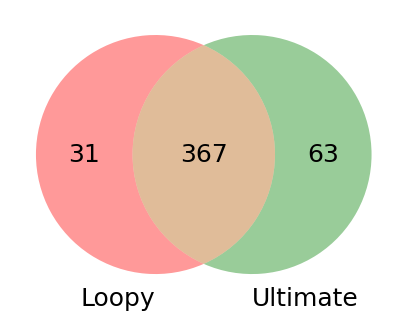

In [146]:
_ = plt.figure(figsize=(5, 5))
out = venn2_unweighted([set(success_benchmarks + repaired_files + exceptions), set(proved_files)], ("Loopy", "Ultimate"))
for text in out.set_labels:
    text.set_fontsize(18)
for text in out.subset_labels:
    text.set_fontsize(18)

plt.savefig("loopy_ultimate_venn.png", bbox_inches='tight')
plt.show()

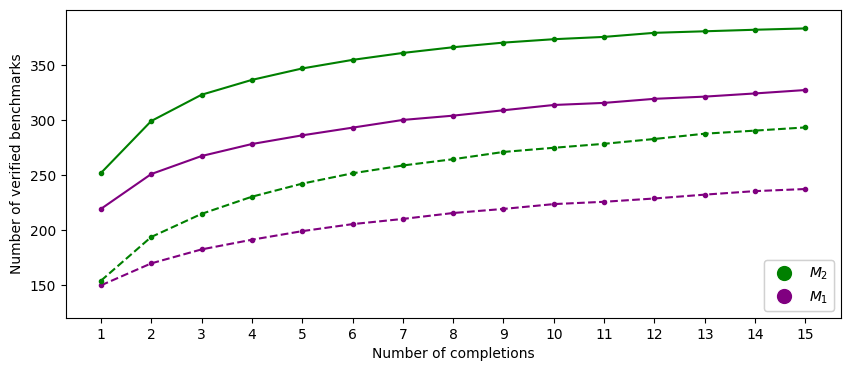

In [156]:
from matplotlib.lines import Line2D

legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='$M_2$', markerfacecolor='green', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='$M_1$', markerfacecolor='purple', markersize=12),
                   ]

x = range(1, 16)
_ = plt.figure(figsize=(10, 4))

plt.plot(x, [m0_stats["pass_at_k_prune"][i] for i in range(1, 16)], '.-', color='purple', label='$M_1$')
plt.plot(x, [m1_stats["pass_at_k_prune"][i] for i in range(1, 16)], '.-', color='green', label='$M_2$')
plt.plot(x, [m0_stats["pass_at_k"][i] for i in range(1, 16)], '.--', color='purple', label='$M_1$')
plt.plot(x, [m1_stats["pass_at_k"][i] for i in range(1, 16)], '.--', color='green', label='$M_2$')
plt.plot()

plt.xticks(range(1, 16))
plt.yticks(range(0, 400, 50))
plt.ylim(120, 400)
plt.xlabel('Number of completions')
plt.ylabel('Number of verified benchmarks')
legend1 = plt.legend(handles=legend_elements, loc='lower right')
plt.gca().add_artist(legend1)
plt.savefig('pass_at_k_graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [105]:
gpt_4_success = (set(success_benchmarks + exceptions))

In [78]:
codellama_file = json.load(open("../codellama/combined_logs_m1_prompt_k_15_15_index_0_600.json", "r", encoding="utf-8"))

In [113]:
codellama_success = []

for benchmark in codellama_file["logs"]:
    if benchmark["pass_at_k_prune"]["15"] == 1.0:
        if len(benchmark["file"]) == 2:
            if benchmark["file"][0].startswith("../data/new_benchmarks/original_benchmarks/"):
                codellama_success.append("../data/benchmarks/" + benchmark["file"][0][len("../data/new_benchmarks/original_benchmarks/"):])
            else:
                codellama_success.append(benchmark["file"][0])
        else:
            if benchmark["file"].startswith("../data/new_benchmarks/original_benchmarks/"):
                codellama_success.append("../data/benchmarks/" + benchmark["file"][len("../data/new_benchmarks/original_benchmarks/"):])
            else:
                codellama_success.append(benchmark["file"])

In [114]:
codellama_success = (set(codellama_success))

In [116]:
len(codellama_success)

269

In [65]:
pass_k = 0.0
pass_k_prune = 0.0

for benchmark in codellama_file["logs"]:
    if benchmark["pass_at_k"]["15"] != 0.0 and benchmark["pass_at_k"]["15"] != 1.0:
        print(benchmark["file"])
    if benchmark["pass_at_k_prune"]["15"] != 0.0 and benchmark["pass_at_k_prune"]["15"] != 1.0:
        print(benchmark["file"])
    pass_k += benchmark["pass_at_k"]["15"]
    pass_k_prune += benchmark["pass_at_k_prune"]["15"]

In [66]:
pass_k, pass_k_prune

(171.0, 269.0)

In [49]:
import json

In [109]:
gpt_35_logs = json.load(open("../combined_logs_m1_stats_15.json", "r", encoding="utf-8"))

In [110]:
gpt_35_success = []
for benchmark in gpt_35_logs["pass_at_15_prune"]:
    if benchmark.startswith("../data/benchmarks"):
        gpt_35_success.append(benchmark)
    elif benchmark.startswith("../data/new_benchmarks/original_benchmarks/"):
        gpt_35_success.append("../data/benchmarks/" + benchmark[len("../data/new_benchmarks/original_benchmarks/"):])

In [111]:
gpt_35_success = set(gpt_35_success)

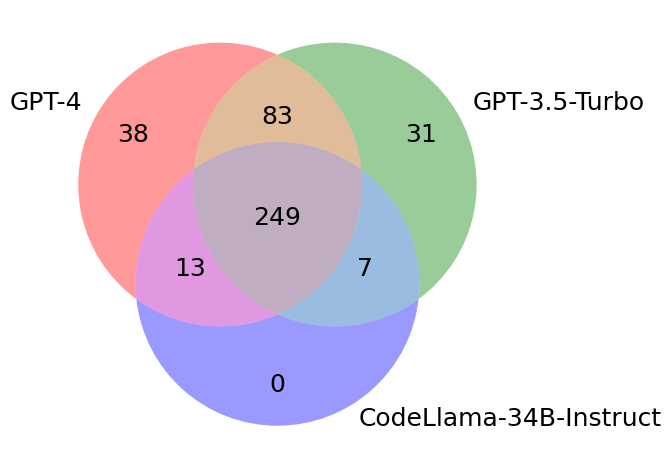

In [146]:
_ = plt.figure(figsize=(6, 6))
out = venn3_unweighted([gpt_4_success, gpt_35_success, codellama_success], ("GPT-4", "GPT-3.5-Turbo", "CodeLlama-34B-Instruct"))
for text in out.set_labels:
    if text.get_text() == "GPT-3.5-Turbo":
        text._x = text._x + 0.2
        text._y = text._y - 0.2
    if text._text == "GPT-4":
        text._x = text._x - 0.2
        text._y = text._y - 0.2
    if text._text == "CodeLlama-34B-Instruct":
        text._x = text._x + 0.7
        text._y = text._y + 0.1
    text.set_fontsize(18)
for text in out.subset_labels:
    text.set_fontsize(18)

plt.savefig("model_intersection_venn.png", bbox_inches='tight')
plt.show()

In [118]:
gpt_35_success - gpt_4_success

{'../data/benchmarks/LinearArbitrary-SeaHorn/VeriMAP/TRACER-testloop17_VeriMAP_true.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/gj2007b_true-unreach-call_true-termination.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/gsv2008_true-unreach-call_true-termination.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_nondet_true-unreach-call_true-termination.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/pie/ICE/benchmarks/fig1.v.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/pie/ICE/benchmarks/incn.v.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/pie/ICE/benchmarks/sum01_safe.v.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/pie/hola/04.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/pie/hola/22.c',
 '../data/benchmarks/LinearArbitrary-SeaHorn/pie/hola/35.c',
 '../data/benchmarks/accelerating_invariant_generation/cav/20.c',
 '../data/benchmarks/accelerating_invariant_generation/cav/35.c',
 '../data/benchmarks/accelerating_inv